### 資料參考: TW511教學網

In [1]:
# 基本資料處理與繪圖套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 紀錄時間與資料格式套件
from datetime import datetime
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p 

In [3]:
# !pip install mlxtend

In [4]:
# !pip install xgboost

In [5]:
# !pip install lightgbm

In [6]:
# 機器學習相關套件
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
# 系統套件
import warnings
import os
warnings.filterwarnings('ignore')

In [8]:
# 檢視資料
print(os.listdir('.'))

['archive.zip', 'data_description.txt', 'Kaggle_House_Price_0511.ipynb', 'Kaggle_House_Price_0518.ipynb', 'Kaggle_House_Price_0525.ipynb', 'MobilePrice', 'sample_submission.csv', 'test.csv', 'train.csv']


In [9]:
# 利用pandas讀入資料
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(1460, 81)


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# df_test = pd.read_csv(r"C:\Users\ccuser\Desktop\test.csv")
df_test = pd.read_csv("test.csv")
df_test.shape

(1459, 80)

In [13]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_sub = pd.read_csv("sample_submission.csv")
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# 資料預處理

In [16]:
# 資料切割
# 將Id欄位取出並從DataFrame刪除
# df_train.Id
# df_train["Id"]
df_train_Id = df_train.Id
df_test_Id = df_test.Id

In [17]:
# 刪除欄位 drop()
df_train.drop(['Id'], axis=1, inplace=True)
# df_train = df_train.drop(['Id'], axis=1)
df_test.drop(['Id'], axis=1, inplace=True)

In [18]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
# 分出數值型資料與類別型資料
all_cols = df_test.columns.tolist()
all_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [22]:
num_cols = [] # 數值型資料欄位List
cat_cols = [] # 類別型資料欄位List

for col in all_cols:
    if(df_test[col].dtype != 'object'):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [23]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [24]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
len(num_cols)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

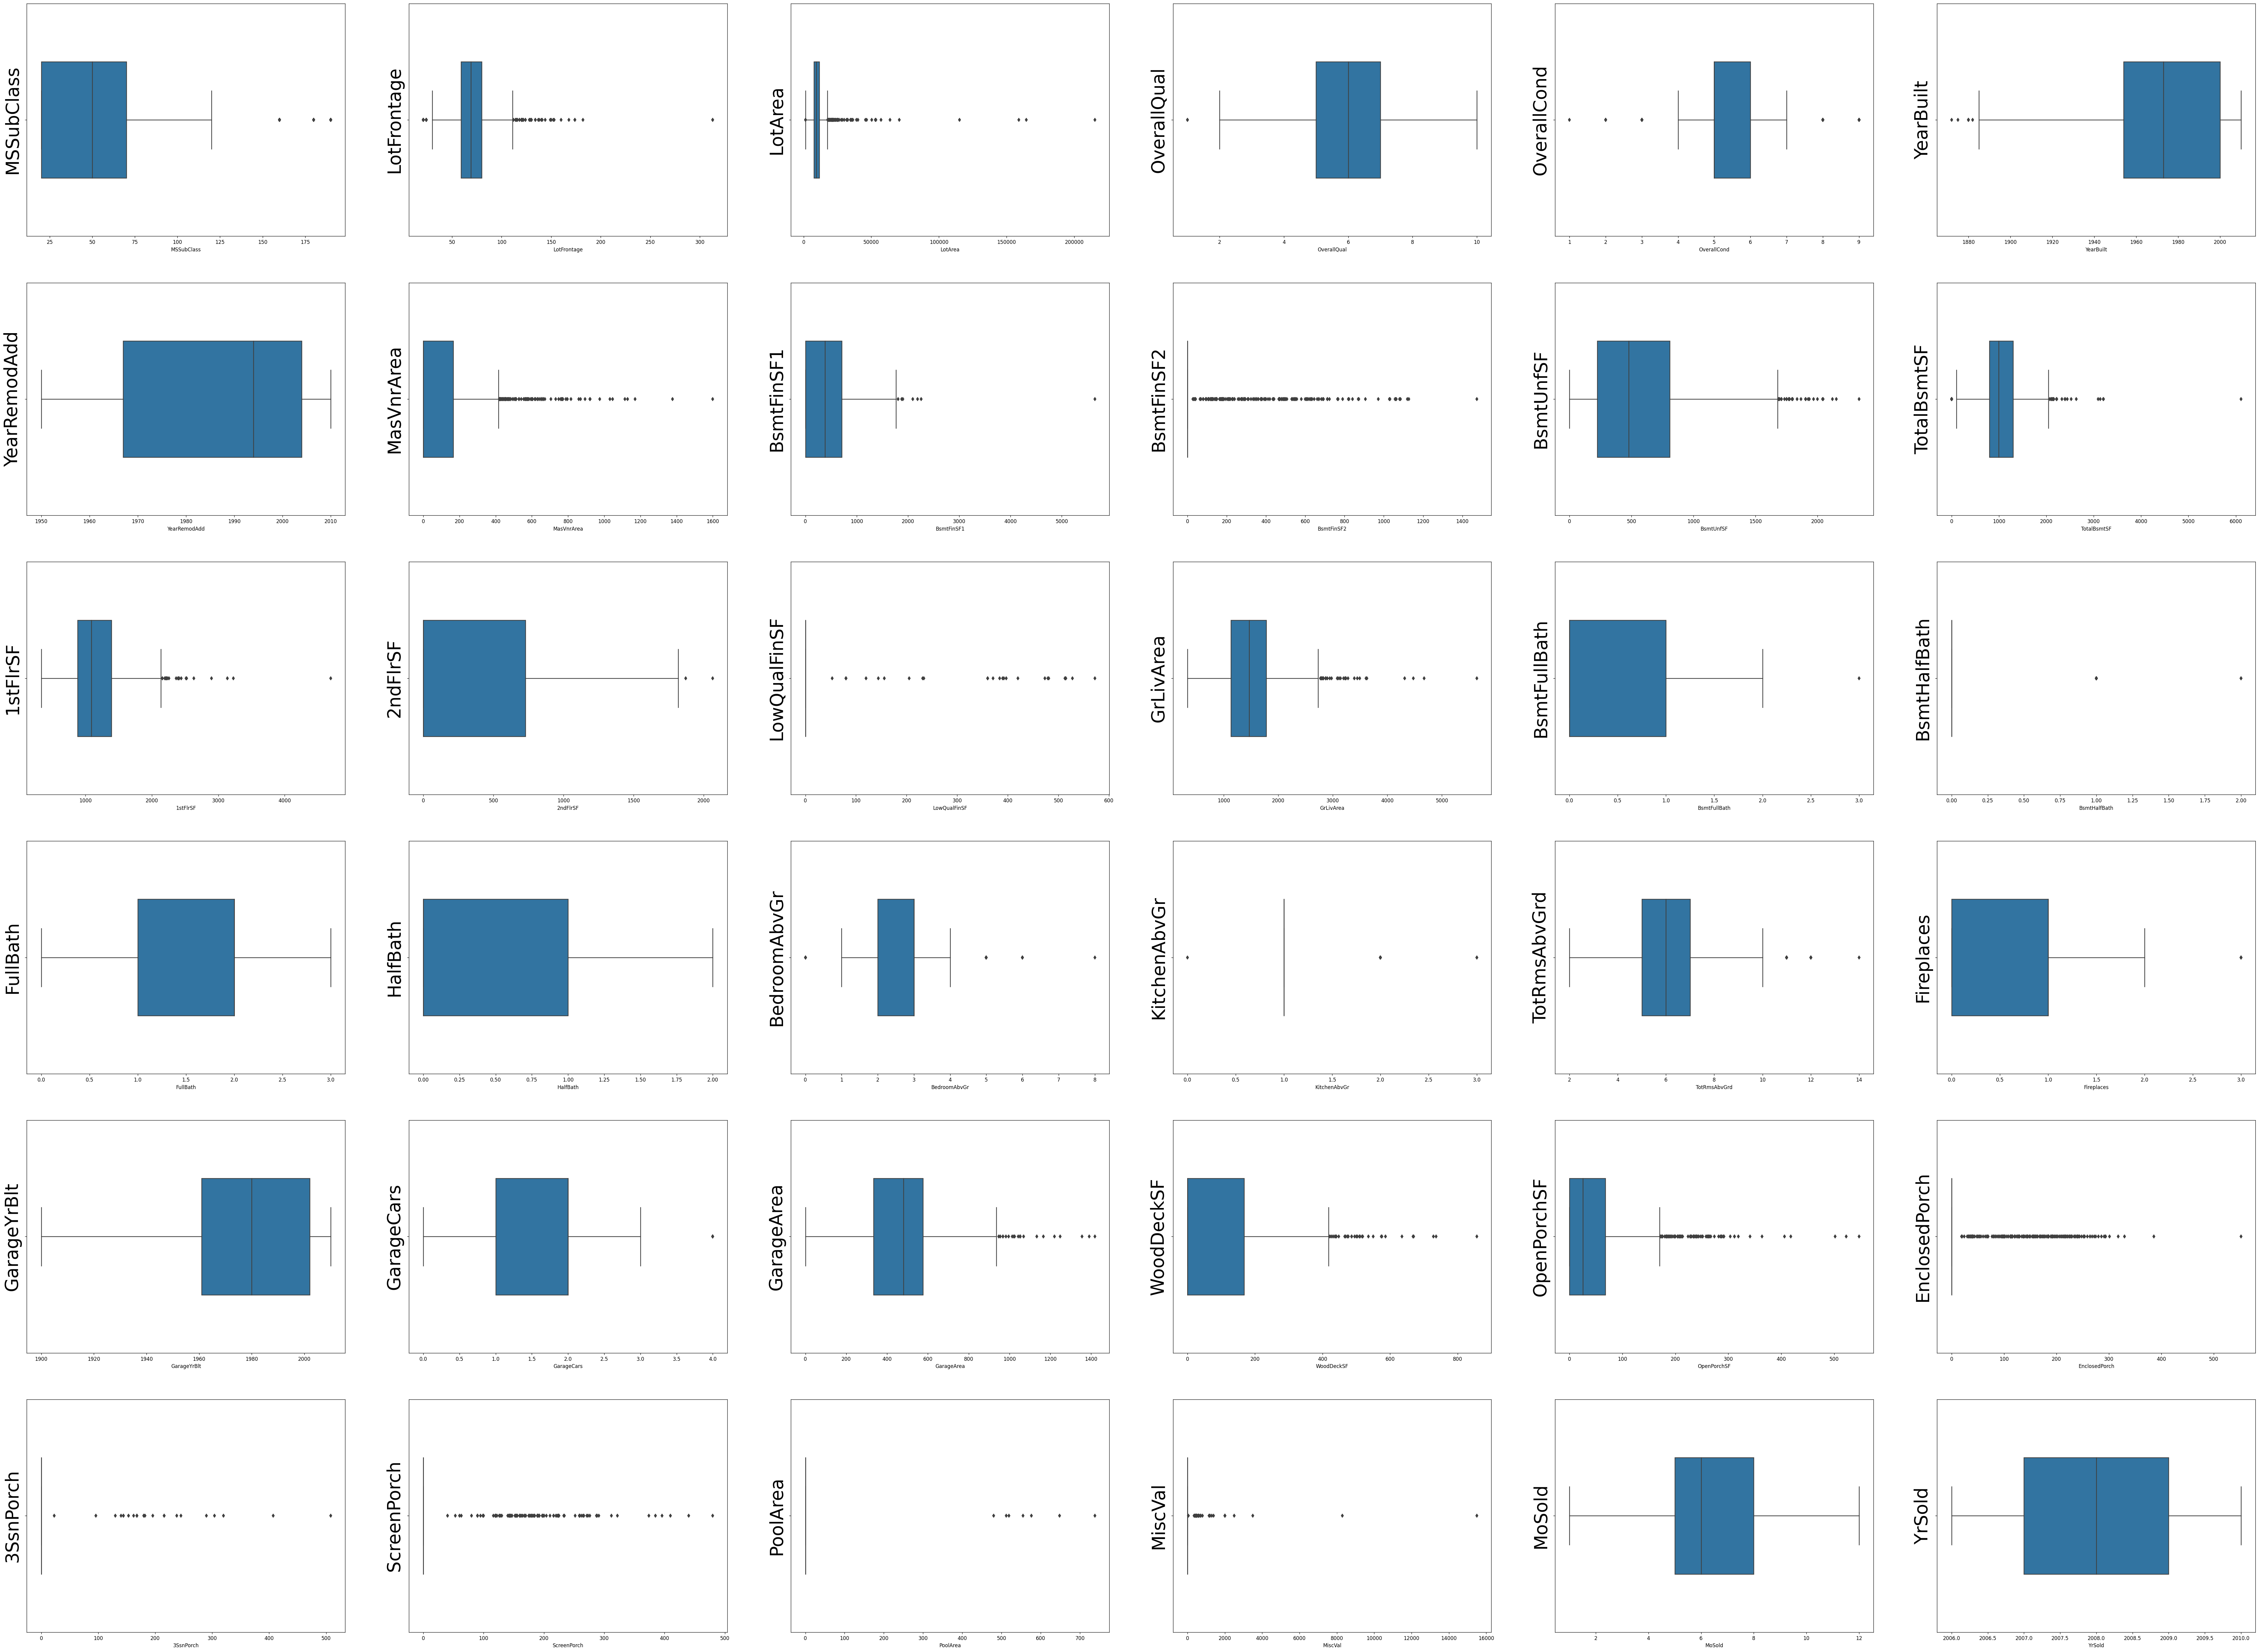

In [26]:
# 繪製圖形
# 新增畫布
fig = plt.figure(figsize=(80, 60), dpi=120)
# i = 0..(36-1)
for i in range(len(num_cols)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(df_train[num_cols[i]], orient='v', width=0.5)
    plt.ylabel(num_cols[i], fontsize=36)
plt.show()

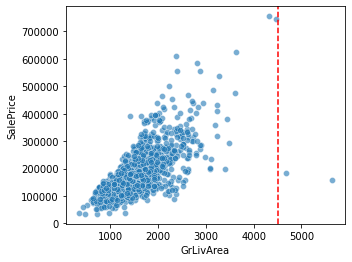

In [27]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, alpha=0.6)
plt.axvline(x=4500, color='r', linestyle='--')

In [28]:
df_train.GrLivArea.sort_values(ascending=False)[:3]

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

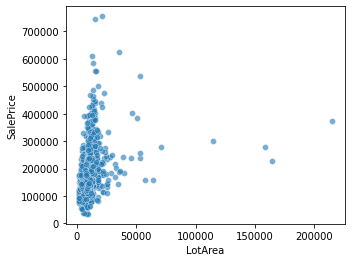

In [29]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

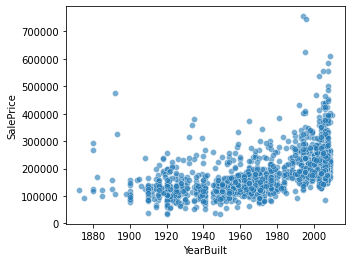

In [30]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

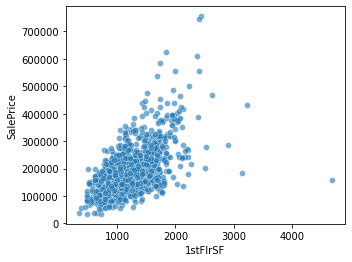

In [31]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df_train, alpha=0.6)

In [32]:
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

1298    4692
496     3228
523     3138
Name: 1stFlrSF, dtype: int64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

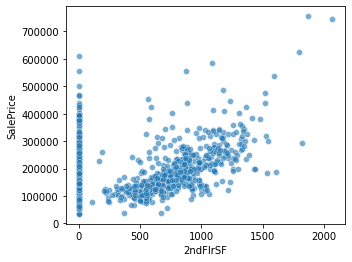

In [33]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

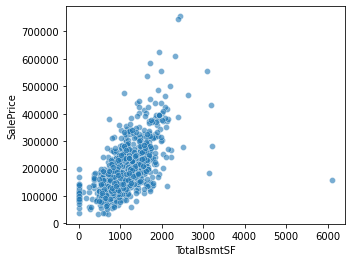

In [34]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, alpha=0.6)

In [35]:
df_train["TotalBsmtSF"].sort_values(ascending=False)[:3]

1298    6110
332     3206
496     3200
Name: TotalBsmtSF, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

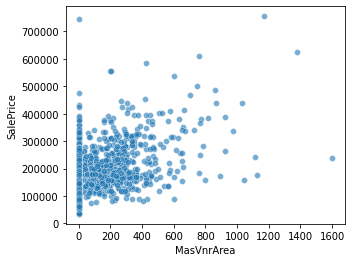

In [36]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df_train, alpha=0.6)

In [37]:
# 異常值刪除
df_train = df_train[df_train["GrLivArea"] < 4500]
# df_train = df_train[df_train.GrLivArea < 4500]
df_train.GrLivArea.sort_values(ascending=False)[:3]

1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [38]:
df_train = df_train[df_train["TotalBsmtSF"] < 4000]
# df_train = df_train[df_train.TotalBsmtSF < 4000]
df_train.TotalBsmtSF.sort_values(ascending=False)[:3]

332    3206
496    3200
440    3094
Name: TotalBsmtSF, dtype: int64

In [39]:
df_train = df_train[df_train["1stFlrSF"] < 3500]
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

496     3228
1024    2898
1373    2633
Name: 1stFlrSF, dtype: int64

In [40]:
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(1458, 80)

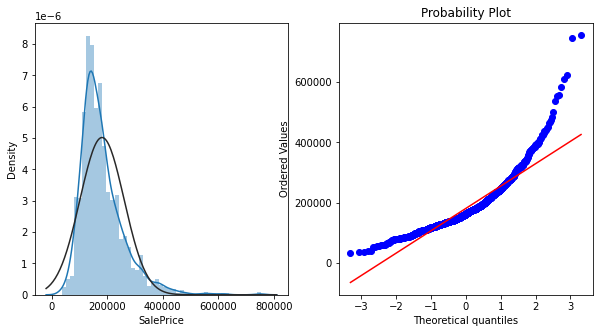

In [41]:
# 對SalePrice繪製長條圖與Q-Q圖(分位圖)，觀察是否符合常態分布
from scipy import stats

plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

In [42]:
df_train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64

In [43]:
# 轉換成對數形式  np.log1p()
df_train.SalePrice = np.log1p(df_train.SalePrice)
df_train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

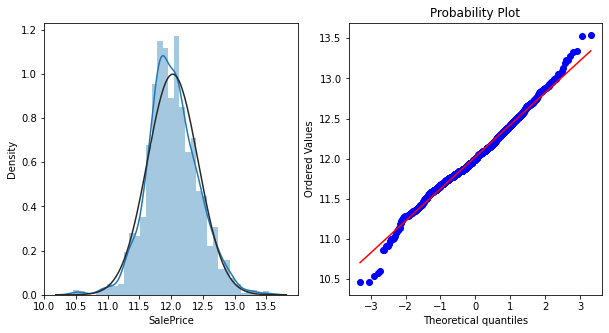

In [44]:
plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

In [45]:
# 合併資料進行統一預處理
# 特徵與標籤分離
y = df_train.SalePrice.reset_index(drop=True)
train_X = df_train.drop(["SalePrice"], axis=1)
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [46]:
df_train.SalePrice.reset_index?

Signature:
df_train.SalePrice.reset_index(
    level=None,
    drop=False,
    name=<no_default>,
    inplace=False,
)
Docstring:
Generate a new DataFrame or Series with the index reset.

This is useful when the index needs to be treated as a column, or
when the index is meaningless and needs to be reset to the default
before another operation.

Parameters
----------
level : int, str, tuple, or list, default optional
    For a Series with a MultiIndex, only remove the specified levels
    from the index. Removes all levels by default.
drop : bool, default False
    Just reset the index, without inserting it as a column in
    the new DataFrame.
name : object, optional
    The name to use for the column containing the original Series
    values. Uses ``self.name`` by default. This argument is ignored
    when `drop` is True.
inplace : bool, default False
    Modify the Series in place (do not create a new object).

Returns
-------
Series or DataFrame or None
    When `drop` is False (th

In [47]:
features = pd.concat([train_X, df_test], axis=0).reset_index(drop=True)
features.shape

(2917, 79)

In [48]:
features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [49]:
# 數值變數中實際為類別變數的特徵欄位(分布並不連續)
transform_cols = []
for col in num_cols:
    if len(features[col].unique()) < 20:
        transform_cols.append(col)
transform_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [50]:
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [51]:
len(features.MSSubClass.unique())

16

In [52]:
features.BsmtFullBath

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2912    0.0
2913    0.0
2914    1.0
2915    0.0
2916    0.0
Name: BsmtFullBath, Length: 2917, dtype: float64

In [53]:
features.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: int64

In [54]:
# MSSubClass、MoSold、YrSold特徵列轉換成string格式
features.MSSubClass = features.MSSubClass.apply(str)
features.MoSold = features.MoSold.apply(str)
features.YrSold = features.YrSold.apply(str)

In [55]:
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: object

In [56]:
num_cols.remove("MSSubClass")
num_cols.remove("MoSold")
num_cols.remove("YrSold")
cat_cols.append("MSSubClass")
cat_cols.append("MoSold")
cat_cols.append("YrSold")

In [57]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [58]:
# 缺失值處理 - 缺失值會導致模型無法運作，所以必須事先處理
features.isna().sum().sort_values(ascending=False)[:35]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [59]:
# 處理PoolQC的NA值 -> 沒有游泳池
features.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [60]:
features.PoolQC.fillna("None").unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [61]:
# 統一處理類別型資料的NA問題
features[cat_cols].isna().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
Exterior2nd         1
Street              0
LandSlope           0
MoSold              0
MSSubClass          0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
Neighborhood        0
HouseStyle          0
Condition1          0
Condition2          0
Foundation          0
RoofMatl            0
RoofStyle           0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
YrSold    

In [62]:
na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
           'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
           'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
for col in na_cols:
    features[col] = features[col].fillna("None")

features[cat_cols].isna().sum().sort_values(ascending=False)

MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageType        0
HeatingQC         0
CentralAir        0
FireplaceQu       0
GarageQual        0
GarageFinish      0
BsmtFinType2      0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleCondition     0
MSSubClass        0
MoSold            0
Heating           0
BsmtExposure      0
BsmtFinType1      0
Street            0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
YrSold            0
dtype: int64

In [63]:
# 眾數
features.SaleType.mode()[0]

'WD'

In [64]:
# 平均值
features.LotArea.mean()

10139.439149811451

In [65]:
# 中位數
features.LotFrontage.median()

68.0

In [66]:
# 缺失值，fillna()填值 - 0、眾數、平均值、中位數
# 其餘沒有NA值的類別型資料，我們以眾數來填補缺失值
# MSZoning: 銷售分區
# MSSubClass: 銷售的住宅類型
no_na_cols = ["MasVnrType", "Functional", "Utilities", "SaleType", "Electrical", "Exterior2nd", "Exterior1st", "KitchenQual"]

for col in no_na_cols:
    features[col] = features[col].fillna(features[col].mode()[0])
    
features[cat_cols].isna().sum().sort_values(ascending=False)

MSZoning         4
GarageFinish     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
Street           0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MoSold           0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
YrSold           0
dtype: int64

In [67]:
features['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2912    RM
2913    RM
2914    RL
2915    RL
2916    RL
Name: MSZoning, Length: 2917, dtype: object

# Pandas Grouping
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html <br>
By “group by” we are referring to a process involving one or more of the following steps:
1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure

In [68]:
# 利用字典創建一個DataFrame
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", np.nan, np.nan, "two", np.nan, "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.882623,1.698027
1,bar,one,0.229798,-1.002378
2,foo,NaN,-1.575467,0.116524
3,bar,NaN,0.365774,-0.454686
4,foo,two,0.475201,-0.223542
5,bar,NaN,-0.541739,0.251165
6,foo,one,2.185317,-0.424033
7,foo,three,-0.705418,0.421745


In [69]:
df.groupby("A").sum()

,C,D
A,,
bar,0.053832,-1.205899
foo,-0.502990,1.588722


In [70]:
# lambda - 匿名的function
# def functionname([參數1, 參數2, ...])
df["B"].transform(lambda x: x.fillna(x.mode()[0]))

0      one
1      one
2      one
3      one
4      two
5      one
6      one
7    three
Name: B, dtype: object

In [71]:
df.B.mode()[0]

'one'

In [72]:
df.groupby("A")["B"].transform(lambda x: x.fillna(x.mode()[0]))

0      one
1      one
2      one
3      one
4      two
5      one
6      one
7    three
Name: B, dtype: object

In [73]:
df.groupby("B").sum()

,C,D
B,,
one,1.532492,0.271616
three,-0.705418,0.421745
two,0.475201,-0.223542


In [74]:
# 樞紐分析表
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.229798 -1.002378
foo one    1.302694  1.273994
    three -0.705418  0.421745
    two    0.475201 -0.223542

In [75]:
# transform and lambda apply
df = pd.DataFrame(
    {
        "A": range(3),
        "B": range(1, 4)
    }
)
df

,A,B
0,0,1
1,1,2
2,2,3


In [76]:
df = df.transform(lambda x: x + 1)
df

,A,B
0,1,2
1,2,3
2,3,4


In [77]:
# MSSubClass(分組) --> MSZoning
features["MSZoning"] = features.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))

In [78]:
features[cat_cols].isna().sum().sort_values(ascending=False)

MSZoning         0
GarageFinish     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
Street           0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MoSold           0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
YrSold           0
dtype: int64

# 以上將所有類別型欄位的缺失值都填補完成
# 接下來要處理數值型欄位的缺失值

In [79]:
# 缺失狀況
features[num_cols].isna().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
YearRemodAdd       0
TotRmsAbvGrd       0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
OverallQual        0
Fireplaces         0
BedroomAbvGr       0
KitchenAbvGr       0
YearBuilt          0
HalfBath           0
FullBath           0
LotArea            0
OverallCond        0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
MiscVal            0
dtype: int64

In [80]:
features.shape

(2917, 79)

In [81]:
(features[num_cols].isna().sum() / features.shape[0]).sort_values(ascending=False)

LotFrontage      0.166610
GarageYrBlt      0.054508
MasVnrArea       0.007885
BsmtFullBath     0.000686
BsmtHalfBath     0.000686
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
GarageArea       0.000343
GarageCars       0.000343
YearRemodAdd     0.000000
TotRmsAbvGrd     0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
OverallQual      0.000000
Fireplaces       0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
YearBuilt        0.000000
HalfBath         0.000000
FullBath         0.000000
LotArea          0.000000
OverallCond      0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
MiscVal          0.000000
dtype: float64

In [82]:
num_na_cols = ["GarageYrBlt", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath", 
               "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

for col in num_na_cols:
    features[col] = features[col].fillna(0)
    
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      486
FullBath           0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
GarageYrBlt        0
Fireplaces         0
dtype: int64

In [83]:
# Neighborhood 物理位置(在Ames city城市的位置) 影響LotFrontage，先利用Neighborhood做groupby，再填LotFrontage的中位數
features["LotFrontage"] = features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      0
FullBath         0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
dtype: int64

In [84]:
features["LotFrontage"] = features["LotFrontage"].transform(lambda x: x.fillna(x.median()))
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      0
FullBath         0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
dtype: int64

In [85]:
features["LotFrontage"].median()

70.0

In [86]:
features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,1,2008,WD,Normal


In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

# 特徵欄位的合併

In [88]:
# 基於已有特徵進行組合
# 房屋居住總面積  TotalBsmtSF: 地下室總面積  GrLivArea: 地上居住總面積
features["TotalSF"] = features["TotalBsmtSF"] + features["GrLivArea"]
features["TotalSF"].head()

0    2566.0
1    2524.0
2    2706.0
3    2473.0
4    3343.0
Name: TotalSF, dtype: float64

In [89]:
features["TotalBsmtSF"].head()

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
Name: TotalBsmtSF, dtype: float64

In [90]:
features["GrLivArea"].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [91]:
# 房屋建築總區域面積  LotFrontage: 房屋到街道之間的距離 LotArea: 建築面積
features["Area"] = features["LotArea"] * features["LotFrontage"]
features["Area"].head()

0     549250.0
1     768000.0
2     765000.0
3     573000.0
4    1197840.0
Name: Area, dtype: float64

In [92]:
# 總衛浴數
features["Total_Bathrooms"] = features["FullBath"] + (0.5 * features["HalfBath"]) + features["BsmtFullBath"] + (0.5 * features["BsmtHalfBath"])
features["Total_Bathrooms"].head()

0    3.5
1    2.5
2    3.5
3    2.0
4    3.5
Name: Total_Bathrooms, dtype: float64

In [93]:
# 門廊總面積
features["Total_PorchSF"] = features["OpenPorchSF"] + features["EnclosedPorch"] + features["3SsnPorch"] + features["ScreenPorch"]
features["Total_PorchSF"].head()

0     61
1      0
2     42
3    307
4     84
Name: Total_PorchSF, dtype: int64

In [94]:
# 將新特徵加到數值欄位中
num_cols.append("TotalSF")
num_cols.append("Area")
num_cols.append("Total_Bathrooms")
num_cols.append("Total_PorchSF")
features.shape

(2917, 83)

In [95]:
len(y)

1458

In [96]:
# features - train + test
# train有 y (SalePrice)，test沒有 y
features.iloc[:len(y), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Area,Total_Bathrooms,Total_PorchSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2008,WD,Normal,2566.0,549250.0,3.5,61
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0,5,2007,WD,Normal,2524.0,768000.0,2.5,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0,9,2008,WD,Normal,2706.0,765000.0,3.5,42
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0,2,2006,WD,Abnorml,2473.0,573000.0,2.0,307
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0,12,2008,WD,Normal,3343.0,1197840.0,3.5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,8,2007,WD,Normal,2600.0,490854.0,2.5,40
1454,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2010,WD,Normal,3615.0,1119875.0,3.0,0
1455,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,3492.0,596772.0,2.0,60
1456,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2010,WD,Normal,2156.0,660756.0,2.0,112


In [97]:
len(num_cols)

37

<AxesSubplot:>

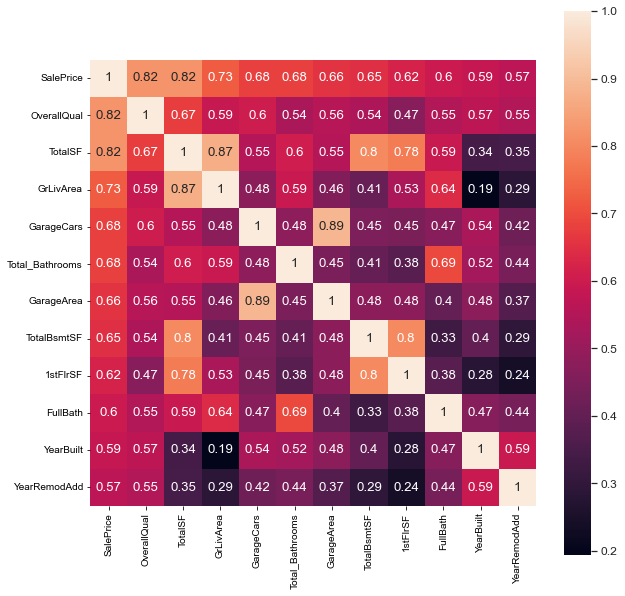

In [98]:
# 繪製熱圖
train_ = features.iloc[:len(y), :]
train_ = pd.concat([train_, y], axis=1)
cols = train_.corr().nlargest(12, "SalePrice").index

plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(train_[cols].corr(), square=True, annot=True)

In [99]:
# 由熱圖可知，完工品質和材料、總居住面積、地面上居住面積、車庫容量數、總浴室數目、車庫面積、總地下室面積、第一層面積等
# 都是與房價密切相關的特徵。
train_["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual'>

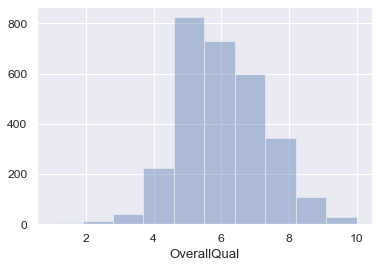

In [100]:
sns.distplot(features['OverallQual'],bins=10,kde=False)

### 分箱 Binning
1. 連續型的特徵資料進行分箱，讓資料有更明確的含義
2. 有效減少資料的過度擬合，測試集的準確才能提升

In [101]:
train_["OverallQual"].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [102]:
def OverallQual_Category(cat):
    if cat <= 4:
        return 1
    elif 4 < cat <= 6:
        return 2
    elif 6 < cat <= 8:
        return 3
    else:
        return 4

features["OverallQual_Cat"] = features["OverallQual"].apply(OverallQual_Category)

In [103]:
features["OverallQual_Cat"].head()

0    3
1    2
2    3
3    3
4    3
Name: OverallQual_Cat, dtype: int64

<AxesSubplot:xlabel='OverallQual_Cat'>

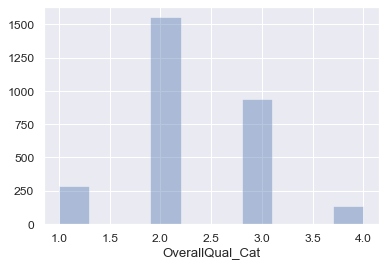

In [104]:
sns.distplot(features["OverallQual_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='TotalSF'>

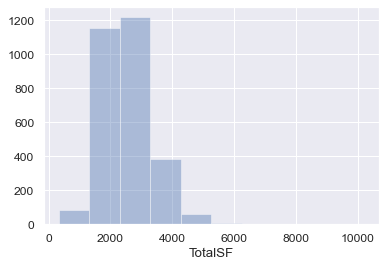

In [105]:
sns.distplot(features["TotalSF"], bins=10, kde=False)

In [106]:
def TotalSF_Category(cat):
    if cat <= 2000:
        return 1
    elif 2000 < cat <= 3000:
        return 2
    elif 3000 < cat <= 4000:
        return 3
    else:
        return 4

features["TotalSF_Cat"] = features["TotalSF"].apply(TotalSF_Category)

In [107]:
features["TotalSF_Cat"].head()

0    2
1    2
2    2
3    2
4    3
Name: TotalSF_Cat, dtype: int64

<AxesSubplot:xlabel='TotalSF_Cat'>

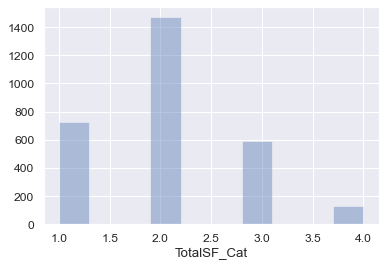

In [108]:
sns.distplot(features["TotalSF_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='GrLivArea'>

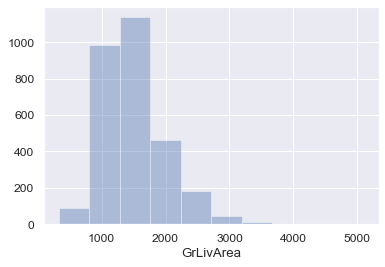

In [109]:
sns.distplot(features["GrLivArea"], bins=10, kde=False)

In [110]:
def GrLivArea_Category(cat):
    if cat <= 1000:
        return 1
    elif 1000 < cat <= 1500:
        return 2
    elif 1500 < cat <= 2000:
        return 3
    else:
        return 4

features["GrLivArea_Cat"] = features["GrLivArea"].apply(GrLivArea_Category)

<AxesSubplot:xlabel='GrLivArea_Cat'>

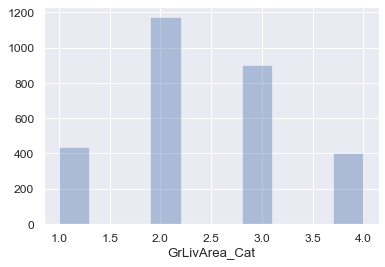

In [111]:
sns.distplot(features["GrLivArea_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='GarageArea'>

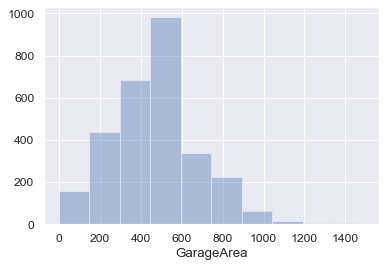

In [112]:
sns.distplot(features["GarageArea"], bins=10, kde=False)

In [113]:
def GarageArea_Category(cat):
    if cat <= 200:
        return 1
    elif 200 < cat <= 400:
        return 2
    elif 400 < cat <= 600:
        return 3
    else:
        return 4

features["GarageArea_Cat"] = features["GarageArea"].apply(GarageArea_Category)

<AxesSubplot:xlabel='GarageArea_Cat'>

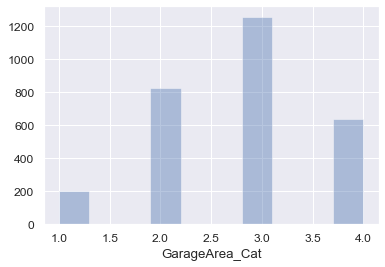

In [114]:
sns.distplot(features["GarageArea_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='TotalBsmtSF'>

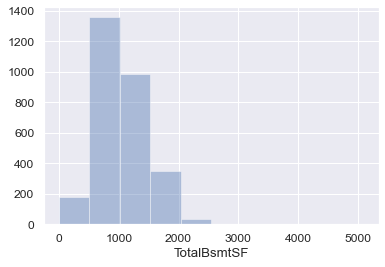

In [115]:
sns.distplot(features["TotalBsmtSF"], bins=10, kde=False)

In [116]:
def TotalBsmtSF_Category(cat):
    if cat <= 600:
        return 1
    elif 600 < cat <= 1000:
        return 2
    elif 1000 < cat <= 1500:
        return 3
    else:
        return 4

features["TotalBsmtSF_Cat"] = features["TotalBsmtSF"].apply(TotalBsmtSF_Category)

<AxesSubplot:xlabel='TotalBsmtSF_Cat'>

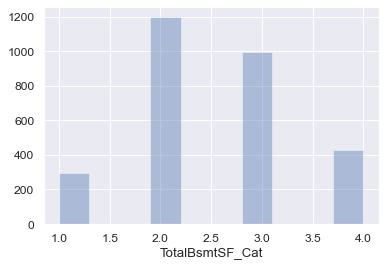

In [117]:
sns.distplot(features["TotalBsmtSF_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='LotFrontage'>

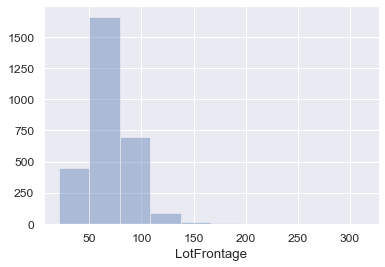

In [118]:
sns.distplot(features["LotFrontage"], bins=10, kde=False)

In [119]:
def LotFrontage_Category(cat):
    if cat <= 50:
        return 1
    elif 50 < cat <= 70:
        return 2
    elif 70 < cat <= 90:
        return 3
    else:
        return 4

features["LotFrontage_Cat"] = features["LotFrontage"].apply(LotFrontage_Category)

<AxesSubplot:xlabel='LotFrontage_Cat'>

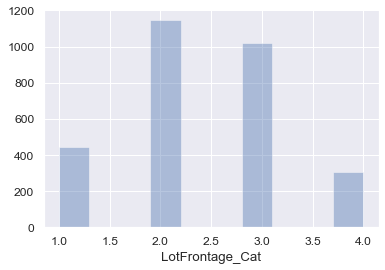

In [120]:
sns.distplot(features["LotFrontage_Cat"], bins=10, kde=False)

In [121]:
# 將建立的分組加入類別型變數中
cat_cols.append('GarageArea_cat')  
cat_cols.append('GrLivArea_cat')   
cat_cols.append('TotalBsmtSF_cat') 
cat_cols.append('TotalSF_cat') 
cat_cols.append('OverallQual_cat')   
cat_cols.append('LotFrontage_cat')

features.shape

(2917, 89)

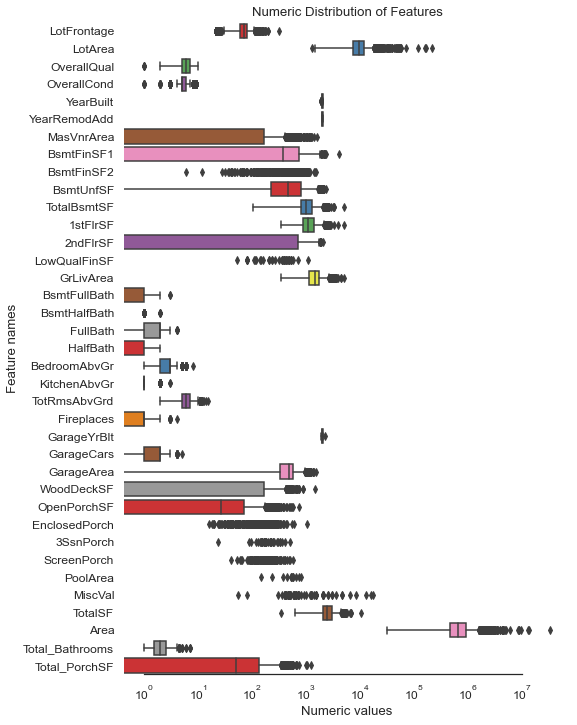

In [122]:
# 數值型變數偏度修正，特徵儘可能轉化為正態分佈狀態
# 繪圖檢視數值型特徵變數的偏度
skew_features = features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 12))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols], orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

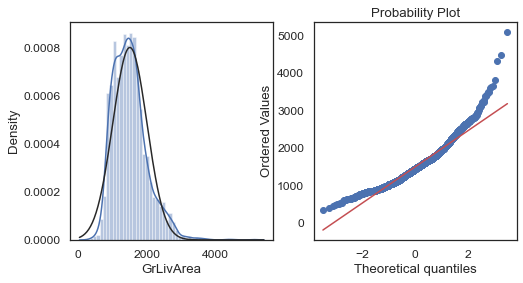

In [123]:
# 繪製直方圖和Q-Q圖，清楚資料分佈結構
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)

In [124]:
# 以0.5作為閾值，統計偏度超過此數值的高偏度分佈資料列，獲取這些資料列的index
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
high_skew.sort_values(ascending=False)

There are 28 numerical features with Skew > 0.5 :


MiscVal          21.939672
Area             18.642721
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
Total_PorchSF     2.244500
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
TotalSF           1.011805
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
dtype: float64

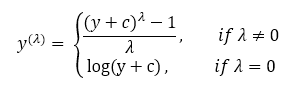

In [125]:
# 對高偏度資料進行處理，將其轉化為正態分佈時，一般使用Box-Cox變換。它可以使資料滿足線性性、獨立性、方差齊次以及正態性的同時，又不丟失資訊。
# 使用boxcox_normmax用於找出最佳的λ值
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea           15.595057
3SsnPorch           8.862045
LowQualFinSF        8.492615
MiscVal             5.237983
BsmtHalfBath        3.779434
KitchenAbvGr        3.778336
ScreenPorch         3.152631
BsmtFinSF2          2.578329
EnclosedPorch       2.149132
MasVnrArea          0.977618
2ndFlrSF            0.895453
WoodDeckSF          0.785550
HalfBath            0.732625
OpenPorchSF         0.621231
BsmtFullBath        0.616643
Fireplaces          0.553135
Total_Bathrooms     0.486443
OverallCond         0.382457
BsmtFinSF1          0.365986
Total_PorchSF       0.355994
BedroomAbvGr        0.326568
TotalBsmtSF         0.297009
GarageArea          0.216857
OverallQual         0.189591
FullBath            0.165514
LotFrontage         0.059189
BsmtUnfSF           0.054195
TotRmsAbvGrd        0.047190
TotalSF             0.027350
GrLivArea           0.008823
Area                0.000000
1stFlrSF           -0.007822
LotArea            -0.138117
GarageCars         -0.219297
YearRemodAdd  

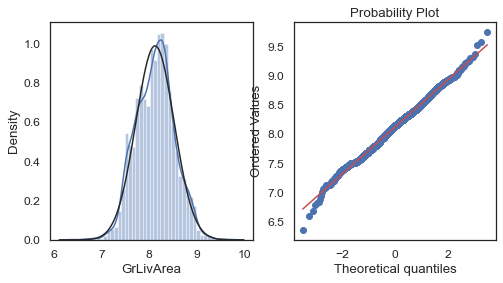

In [126]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)